In [1]:
import os
import pandas as pd
import numpy as np
from IPython.core.display import HTML
import geopy.distance
from geopy.distance import great_circle, geodesic
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import pickle
from sklearn.utils import check_array
pd.set_option('display.max_rows', 1000)

# Load the Data

In [2]:
rawData = pd.read_csv('train_cab.csv', na_values={"pickup_datetime":"43"})
rawData.head(100)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.50,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.90,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.70,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.70,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.30,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.10,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.50,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.50,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1.0
8,NaN,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1.0
9,8.90,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2.0


In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16043 non-null float64
pickup_datetime      16066 non-null object
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: float64(6), object(1)
memory usage: 878.8+ KB


In [4]:
# User defined function to convert to datetime format
def toDateTime(a):
    temp = []
    for i in a:
        temp.append(pd.to_datetime(i, errors='coerce'))
    return temp

In [5]:
# Function Call
rawData['pickup_datetime'] = toDateTime(rawData['pickup_datetime'])

In [6]:
rawData.shape

(16067, 7)

In [7]:
rawData.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16043.000000,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,15.040871,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,430.459997,10.578384,6.826587,10.575062,6.187087,60.844122
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,8.500000,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,12.500000,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [8]:
rawData['fare_amount'] = pd.to_numeric(rawData['fare_amount'])

In [9]:
rawData.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [10]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16043 non-null float64
pickup_datetime      16066 non-null datetime64[ns, UTC]
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: datetime64[ns, UTC](1), float64(6)
memory usage: 878.8 KB


# Data Pre-Processing

### Missing Value Analysis

In [11]:
def calMissingValues(df):
    return df.isna().sum()

In [12]:
# Missing values in each column
print(calMissingValues(rawData))
print('\n\nTotal missing values: ', rawData.isna().sum().sum())

fare_amount          24
pickup_datetime       1
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64


Total missing values:  80


In [13]:
per = ((rawData.isna().sum().sum())/(rawData.shape[0]))*100
print('Therefore', per, 'percentage of the rows have missing values.')

Therefore 0.49791498101699133 percentage of the rows have missing values.


We can impute the missing values OR we can delete them. Since missing value percentage is very less, we can delete them for now.

In [14]:
# User defined Function to drop rows having missing values
def dropMissingValueRows(df):
    temp = df.dropna(axis=0)
    return temp

In [15]:
data = dropMissingValueRows(rawData)

In [16]:
data.shape

(15987, 7)

Number of rows reduced from 16067 to 15987.

16067-15987 = 80. <br> We have lost 80 rows due to missing value analysis.

### Outlier Analysis

In [17]:
# Displaying all column names in the dataframe
cnames = data.columns
cnames

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [18]:
# Storing the values of data to data_copy for future reference
data_copy1 = data.copy()
#data = data_copy1.copy()

Latitudes range from -90 to +90. <br>
Logitudes range from -180 to +180.

In [19]:
# User defined function to Check if there are any values out of range
def outOfRangeValues(df):
    print('pickup_longitude above 180 = {}'.format(sum(df['pickup_longitude']>180)))
    print('pickup_longitude below -180 = {}'.format(sum(df['pickup_longitude']<-180)))
    print('pickup_latitude above 90 = {}'.format(sum(df['pickup_latitude']>90)))
    print('pickup_latitude below -90 = {}'.format(sum(df['pickup_latitude']<-90)))
    print('dropoff_longitude above 180 = {}'.format(sum(df['dropoff_longitude']>180)))
    print('dropoff_longitude below -180 = {}'.format(sum(df['dropoff_longitude']<-180)))
    print('dropoff_latitude below -90 = {}'.format(sum(df['dropoff_latitude']<-90)))
    print('dropoff_latitude above 90 = {}'.format(sum(df['dropoff_latitude']>90)))

In [20]:
# Call to the function outOfRangeValues()
outOfRangeValues(data)

pickup_longitude above 180 = 0
pickup_longitude below -180 = 0
pickup_latitude above 90 = 1
pickup_latitude below -90 = 0
dropoff_longitude above 180 = 0
dropoff_longitude below -180 = 0
dropoff_latitude below -90 = 0
dropoff_latitude above 90 = 0


There is 1 outlier in the pickup_latitude column. Hence we will delete it.

In [21]:
# User defined function to drop - out of range values
def dropOutOfRangeValues(df):
    df = df.drop(df[df['pickup_latitude'] > 90].index, axis=0)
    df = df.drop(df[df['pickup_latitude'] < -90].index, axis=0)
    df = df.drop(df[df['pickup_longitude'] > 180].index, axis=0)
    df = df.drop(df[df['pickup_longitude'] < -180].index, axis=0)
    df = df.drop(df[df['dropoff_latitude'] > 90].index, axis=0)
    df = df.drop(df[df['dropoff_latitude'] < -90].index, axis=0)
    df = df.drop(df[df['dropoff_longitude'] > 180].index, axis=0)
    df = df.drop(df[df['dropoff_longitude'] < -180].index, axis=0)
    return df

In [22]:
# Call to the function dropOutOfRangeValues()
data = dropOutOfRangeValues(data)

In [23]:
data.shape

(15986, 7)

Number of rows reduced from 15987 to 15986.

In [24]:
# User defined function to Check if there are any values equal to zero.
def checkNumOfValuesEqualToZero(df):
    for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
        print(i,'equal to 0 = {}'.format(sum(df[i]==0)))

In [25]:
# Call to the function checkNumOfValuesEqualToZero()
checkNumOfValuesEqualToZero(data)

pickup_longitude equal to 0 = 313
pickup_latitude equal to 0 = 313
dropoff_longitude equal to 0 = 312
dropoff_latitude equal to 0 = 310


There are many values equal to zero. We will delete them column wise.

In [26]:
# User defined function to Drop/Delete rows having values equal to Zero
def dropRowsWithValuesEqualToZero(df):
    df = df.drop(df[df['pickup_longitude'] == 0].index, axis=0)
    df = df.drop(df[df['pickup_latitude'] == 0].index, axis=0)
    df = df.drop(df[df['dropoff_longitude'] == 0].index, axis=0)
    df = df.drop(df[df['dropoff_latitude'] == 0].index, axis=0)
    return df

In [27]:
# Call to the function dropRowsWithValuesEqualToZero()
data = dropRowsWithValuesEqualToZero(data)

In [28]:
data.shape

(15662, 7)

Number of rows reduced from 15986 to 15662.

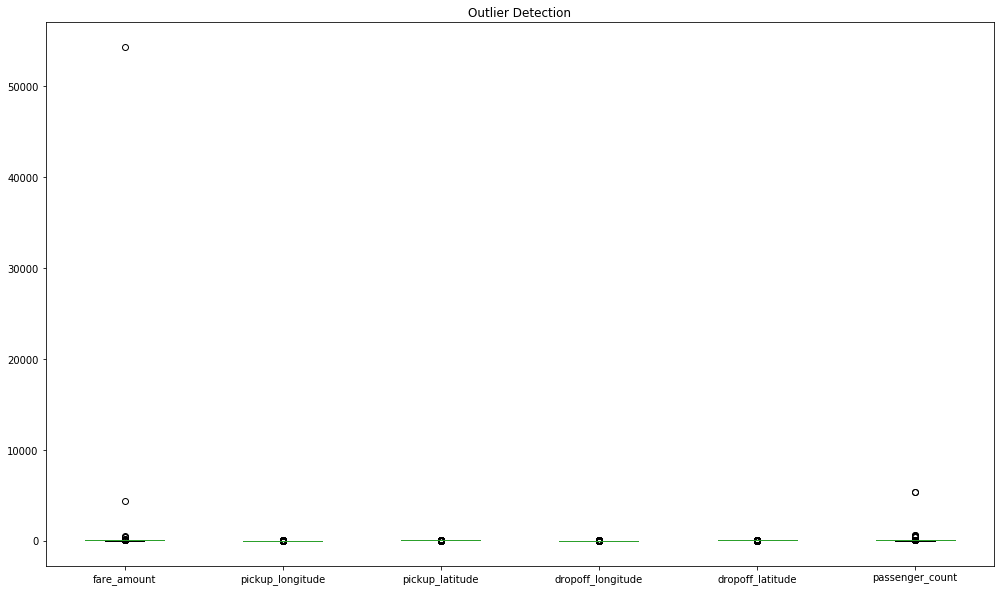

In [29]:
data[['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count']].plot.box(figsize = (17,10), legend=True, title='Outlier Detection')

There are many outliers. We will remove them one by one.

Removing outliers from passenger_count variable.

In [30]:
# Different value counts in passenger_count column
data['passenger_count'].value_counts()

1.00       11004
2.00        2283
5.00        1024
3.00         662
4.00         320
6.00         295
0.00          55
43.00          2
456.00         1
0.12           1
1.30           1
531.20         1
345.00         1
87.00          1
557.00         1
58.00          1
35.00          1
535.00         1
536.00         1
537.00         1
554.00         1
53.00          1
5334.00        1
5345.00        1
354.00         1
Name: passenger_count, dtype: int64

In [31]:
for i in range(1,15):
    print('Number of Clients with passenger_count value above ' + str(i) + ' = {}'.format(sum(data['passenger_count'] >= i)))

Number of Clients with passenger_count value above 1 = 15606
Number of Clients with passenger_count value above 2 = 4601
Number of Clients with passenger_count value above 3 = 2318
Number of Clients with passenger_count value above 4 = 1656
Number of Clients with passenger_count value above 5 = 1336
Number of Clients with passenger_count value above 6 = 312
Number of Clients with passenger_count value above 7 = 17
Number of Clients with passenger_count value above 8 = 17
Number of Clients with passenger_count value above 9 = 17
Number of Clients with passenger_count value above 10 = 17
Number of Clients with passenger_count value above 11 = 17
Number of Clients with passenger_count value above 12 = 17
Number of Clients with passenger_count value above 13 = 17
Number of Clients with passenger_count value above 14 = 17


Number of clients with Passenger_count value above 6 is consistent. Therefore 6 can be taken as a maximum passenger_count.

In [32]:
## Rows having passenger_count value less than 0
#data[data['passenger_count'] <= 0]

In [33]:
## Rows having passenger_count value greater than 6
# data[data['passenger_count'] > 6]

In [34]:
# Storing the values of data to data_copy for future reference
data_copy2 = data.copy()
#data = data_copy2.copy()

In [35]:
# User defined function to Delete rows having passenger_count values greater than 6 and less than or equal to 0.
def cleanPassengerCount(df):
    df = df.drop(df[df['passenger_count'] <= 0].index, axis=0)
    df = df.drop(df[df['passenger_count'] > 6].index, axis=0)
    print('Removed rows that have passenger_count value less than zero and greater than 6.')
    print('Number of rows reduced to ', df.shape[0], '\n\n')
    
    print('Unique values present in passenger_count variable: ')
    print(df['passenger_count'].unique())
    
    keep = [1,2,3,4,5,6]
    df = df[df['passenger_count'].isin(keep)]
    # OR
    # remove = [1.3, 0.12]
    # df = df[~df['passenger_count'].isin(remove)]
    print('\n\nRemoved rows which have passenger_count value other than 1,2,3,4,5,6')
    print('Number of rows reduced to ', df.shape[0], '\n\n')
    
    print('Unique values present in passenger_count variable after removing values other than 1,2,3,4,5,6: ')
    print(sorted(df['passenger_count'].unique()))
    
    df['passenger_count'] = df['passenger_count'].astype(np.int64)
    print('\n\nConverted passenger_count column from float to int.')

    return df

In [36]:
# Call to the function cleanPassengerCount()
data = cleanPassengerCount(data)

Removed rows that have passenger_count value less than zero and greater than 6.
Number of rows reduced to  15590 


Unique values present in passenger_count variable: 
[1.   2.   3.   6.   5.   4.   1.3  0.12]


Removed rows which have passenger_count value other than 1,2,3,4,5,6
Number of rows reduced to  15588 


Unique values present in passenger_count variable after removing values other than 1,2,3,4,5,6: 
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]


Converted passenger_count column from float to int.


In [37]:
data.shape

(15588, 7)

Number of rows reduced from 15662 to 15588.

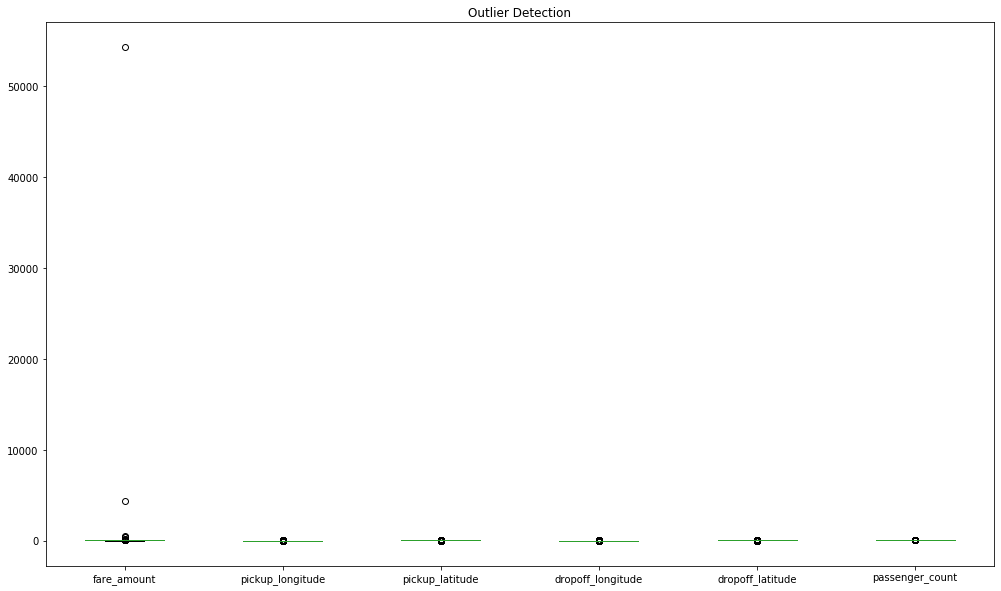

In [38]:
# Box plot to check outliers in the data
data[['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count']].plot.box(figsize = (17,10), legend=True, title='Outlier Detection')

In [39]:
# Storing the values of data to data_copy for future reference
data_copy3 = data.copy()
#data = data_copy3.copy()

In [40]:
# Function to remove outliers from fare_amount column.
def cleanFareAmount(df):
    print('Removing fare_amount value which is more than 0.9995 quantile.')
    q = df['fare_amount'].quantile(0.9995)
    print('\nValue at 0.9995 quantile = ', q, '\n')
    
    print('Rows with fare_amount value more than 0.9995 quantile value.')
    display(df[df['fare_amount'] > q])
    
    print('\nDeleting rows where fare_amount value is more than 0.9995 quantile value.\n\n')
    df = df.drop(df[df['fare_amount'] > q].index, axis=0)
    print('Successfully Deleted...')
    
    print('__________________________________________________________________')
    
    print('\n\n\nRows with fare_amount value less than or equal to 0')
    display(df[df['fare_amount'] <= 0])
    
    print('\nDeleting rows with fare_amount value, less than or equal to 0.\n\n')
    df = df.drop(df[df['fare_amount'] <= 0].index, axis=0)
    print('Successfully Deleted...')

    
    return df

In [41]:
# Function Call
data = cleanFareAmount(data)

Removing fare_amount value which is more than 0.9995 quantile.

Value at 0.9995 quantile =  105.35764500000077 

Rows with fare_amount value more than 0.9995 quantile value.


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
607,453.0,2011-03-03 07:40:59+00:00,-74.007816,40.733536,-73.986556,40.740040,1
980,434.0,2011-10-24 22:54:00+00:00,-73.990602,40.761100,-73.960025,40.779580,2
1015,54343.0,2015-02-27 17:03:50+00:00,-74.003319,40.727455,-73.964470,40.764378,1
1072,4343.0,2012-01-15 20:42:04+00:00,-73.976309,40.751634,-74.014854,40.709044,1
1123,430.0,2009-09-22 19:01:01+00:00,-73.979610,40.771326,-73.975764,40.781965,1
1335,180.0,2013-01-16 20:19:58+00:00,-74.429332,40.500046,-74.429332,40.500046,1
1483,165.0,2009-08-07 21:49:13+00:00,-73.633363,41.032490,-73.633671,41.032598,1
14142,108.0,2014-12-12 10:13:00+00:00,-74.013570,40.705930,-74.000740,40.738960,1



Deleting rows where fare_amount value is more than 0.9995 quantile value.


Successfully Deleted...
__________________________________________________________________



Rows with fare_amount value less than or equal to 0


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2039,-2.9,2010-03-09 23:37:10+00:00,-73.789450,40.643498,-73.788665,40.641952,1
2486,-2.5,2015-03-22 05:14:27+00:00,-74.000031,40.720631,-73.999809,40.720539,1
10002,0.0,2010-02-15 14:26:01+00:00,-73.987115,40.738808,-74.005911,40.713960,1
13032,-3.0,2013-08-30 08:57:10+00:00,-73.995062,40.740755,-73.995885,40.741357,4



Deleting rows with fare_amount value, less than or equal to 0.


Successfully Deleted...


In [42]:
data.shape

(15576, 7)

Number of rows reduced from 15588 to 15576.

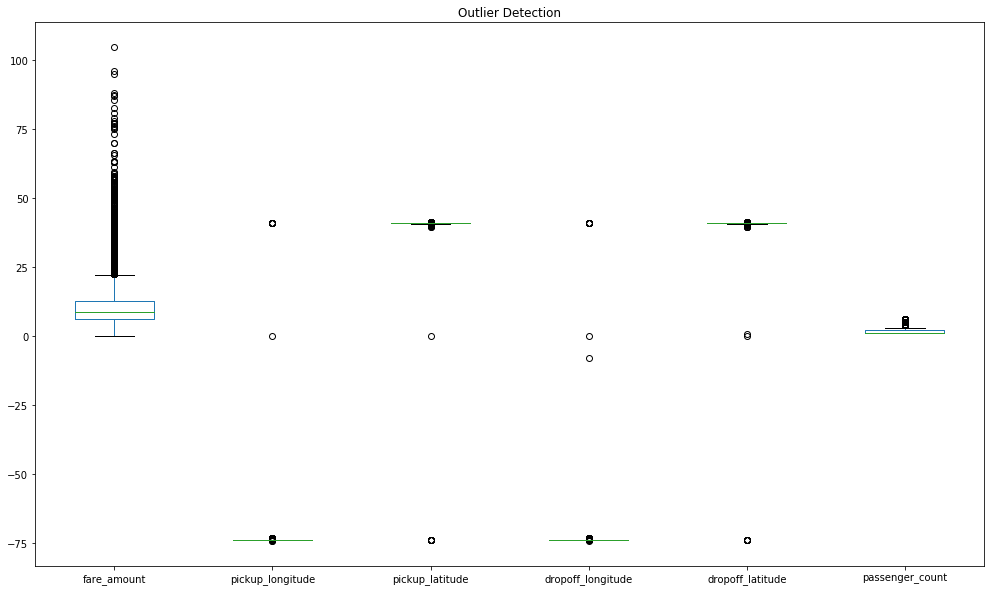

In [43]:
data[['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count']].plot.box(figsize = (17,10), legend=True, title='Outlier Detection')

In [44]:
# Store the copy of the data into data_copy1
data_copy4 = data.copy()
#data = data_copy4.copy()

In [45]:
# Function to detect outliers and delete from each column.
def outlier_treatment(col):
    ''' calculating outlier indices and replacing them with NA  '''
    print('-------------',col,'------------')
    #Extract quartiles
    q25, q75 = np.percentile(data[col], [25 ,75])
    print('25th and 75th percentile values are: ',q25,q75)
    #Calculate IQR
    iqr = q75 - q25
    #Calculate inner and outer fence
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    print('Inner and Outer fence values are: ',minimum,maximum, '\n')
    #Replace with NA
    data.loc[data[col] < minimum,col] = np.nan
    data.loc[data[col] > maximum,col] = np.nan

In [46]:
# Function call for each column.
outlier_treatment('fare_amount')
outlier_treatment('pickup_longitude')
outlier_treatment('pickup_latitude')
outlier_treatment('dropoff_longitude')
outlier_treatment('dropoff_latitude')

# Outlier removal for passenger_count column is not required since we have already done removed.
##outlier_treatment('passenger_count')

------------- fare_amount ------------
25th and 75th percentile values are:  6.0 12.5
Inner and Outer fence values are:  -3.75 22.25 

------------- pickup_longitude ------------
25th and 75th percentile values are:  -73.9923694025 -73.96805350000001
Inner and Outer fence values are:  -74.02884325624998 -73.93157964625001 

------------- pickup_latitude ------------
25th and 75th percentile values are:  40.73655375 40.7678036425
Inner and Outer fence values are:  40.68967891125 40.81467848125 

------------- dropoff_longitude ------------
25th and 75th percentile values are:  -73.991363 -73.96536524999999
Inner and Outer fence values are:  -74.03035962500003 -73.92636862499997 

------------- dropoff_latitude ------------
25th and 75th percentile values are:  40.736296499999995 40.7683105
Inner and Outer fence values are:  40.68827549999999 40.816331500000004 



In [47]:
# Function call to check how many missing values are there in each column.
calMissingValues(data)

fare_amount          1348
pickup_datetime         0
pickup_longitude      802
pickup_latitude       505
dropoff_longitude     916
dropoff_latitude      749
passenger_count         0
dtype: int64

In [48]:
# Delete rows having NaN values.
data = data.dropna(axis=0)

In [49]:
data.shape

(13353, 7)

Number of rows reduced from 15576 to 13353.

15987-13353 = 2634 <br>
We have lost 2634 rows due to Outlier analysis.

### Feature Engineering: Extract few columns from pickup_datetime

In [50]:
# Extracting different values from pickup_datetime column.
data['year'] = data['pickup_datetime'].apply(lambda x: x.year)
data['month'] = data['pickup_datetime'].apply(lambda x: x.month)
data['day_of_week'] = data['pickup_datetime'].apply(lambda x: x.dayofweek)
data['hour'] = data['pickup_datetime'].apply(lambda x: x.hour)

In [51]:
print(data.columns)
print('\n\nMissing Values of each Columns: ')
print(calMissingValues(data))
#display(HTML(data.to_html()))
display(data.head(100))

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day_of_week', 'hour'],
      dtype='object')


Missing Values of each Columns: 
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
day_of_week          0
hour                 0
dtype: int64


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day_of_week,hour
1,16.90,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,16
2,5.70,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,3,0
3,7.70,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,5,4
4,5.30,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,1,7
5,12.10,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1,2011,1,3,9
6,7.50,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1,2012,11,1,20
7,16.50,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1,2012,1,2,17
9,8.90,2009-09-02 01:11:00+00:00,-73.980658,40.733873,-73.991540,40.758138,2,2009,9,2,1
10,5.30,2012-04-08 07:30:50+00:00,-73.996335,40.737142,-73.980721,40.733559,1,2012,4,6,7
12,4.10,2009-11-06 01:04:03+00:00,-73.991601,40.744712,-73.983081,40.744682,2,2009,11,4,1


Since we have extracted meaningfull values from pickup_datetime, drop that column.

In [52]:
# Dropping the column pickup_datetime
data = data.drop(columns=['pickup_datetime'])
data.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day_of_week', 'hour'],
      dtype='object')

In [53]:
# Store a copy of the data to data_copy2
data_copy5 = data.copy()
#data = data_copy5.copy()

### Calculate the distance using the given latitudes and longitudes

One of the formula <br>
dist = 6371.01 * acos(sin(slat)*sin(elat) + cos(slat)*cos(elat)*cos(slon - elon))

In [54]:
# Calculating the distance using latitude and longitude values 
for index, row in data.iterrows():
    coords1 = (row['pickup_latitude'], row['pickup_longitude'])
    coords2 = (row['dropoff_latitude'], row['dropoff_longitude'])
    #print(coords1, coords2)
    data['vincenty_distance'] = geopy.distance.vincenty(coords1, coords2).km
    data['great_circle_distance'] = great_circle(coords1, coords2).km
    data['geodesic_distance'] = geodesic(coords1, coords2).km

C:\Users\SANDEEP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  


In [55]:
# User defined function for Calculating Haversine distance using pickup longitute and latitude values.
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lat1=a[0]
    lon1=a[1]
    lat2=a[2]
    lon2=a[3]
    
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    # asin -> inverse sine function
    c =  2 * asin(sqrt(a))
    
    # Radius of earth in kilometers is 6371
    km = 6371 * c
    return km

In [56]:
# Function call to calculate Haversine_distance
data['haversine_distance'] = data[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']].apply(haversine, axis=1)

In [57]:
# Store the distances for future reference
distances = pd.DataFrame(data[['haversine_distance','vincenty_distance', 'great_circle_distance', 'geodesic_distance']], index=data.index)

,haversine_distance,vincenty_distance,great_circle_distance,geodesic_distance
1,8.450134,2.593236,2.59004,2.593236
2,1.389525,2.593236,2.59004,2.593236
3,2.799270,2.593236,2.59004,2.593236
4,1.999157,2.593236,2.59004,2.593236
5,3.787239,2.593236,2.59004,2.593236
...,...,...,...,...
16061,3.357490,2.593236,2.59004,2.593236
16062,0.850044,2.593236,2.59004,2.593236
16063,7.867638,2.593236,2.59004,2.593236
16064,1.469105,2.593236,2.59004,2.593236


(4.5, -0.5)

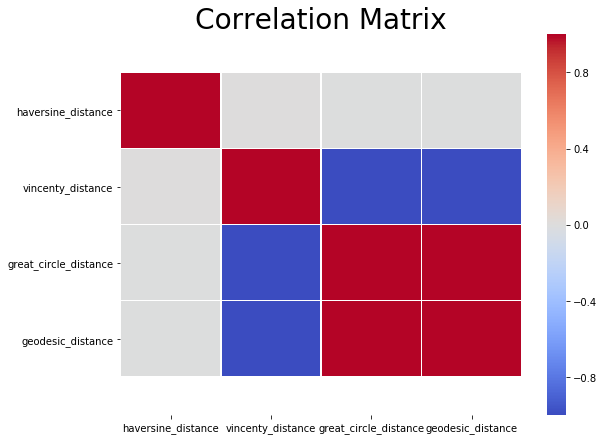

In [58]:
# Print distances
display(distances)

# Plot correlation matrix for 3 distances
plt.figure(figsize = (9, 7))
plt.title('Correlation Matrix', size=28)
temp = distances.corr()
temp = pd.DataFrame(temp)
ax = sns.heatmap(temp, cmap='coolwarm',linewidths=0.5, linecolor='w')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [59]:
# Calculating Correlation matrix
correlation_matrix = data.corr()

# Converting it to dataframe
correlation_matrix = pd.DataFrame(correlation_matrix)

(14.5, -0.5)

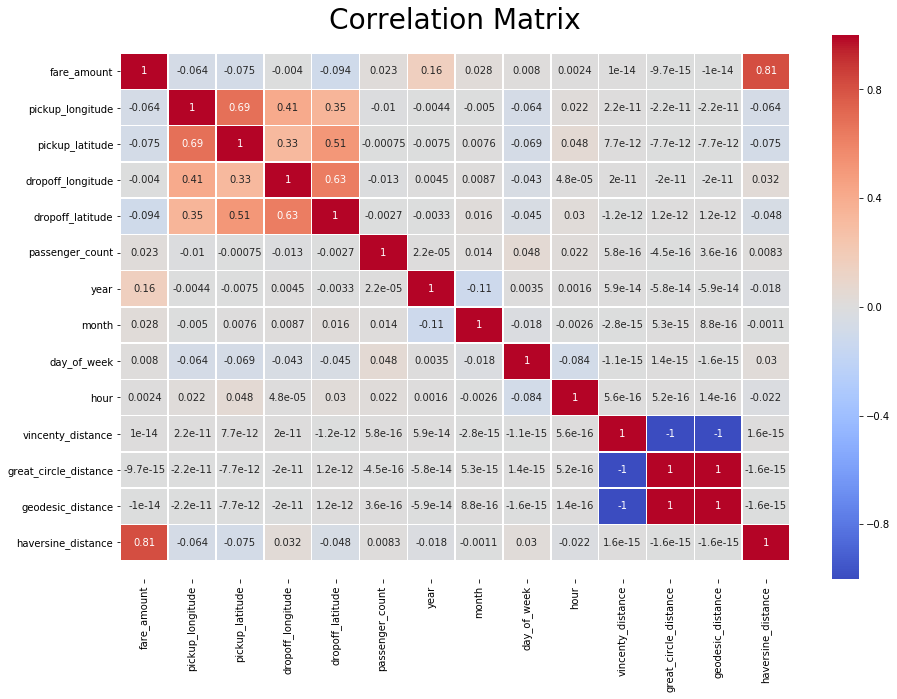

In [60]:
# Plotting heatmap for correlation matrix
plt.figure(figsize = (15, 10))
ax = sns.heatmap(correlation_matrix, cmap='coolwarm',linewidths=0.5, linecolor='w', annot=True)
plt.title('Correlation Matrix', size=28)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Let's keep haversine_distance and delete other three.

In [61]:
# Drop 3 columns vincenty_distance, great_circle_distance, geodesic_distance
data = data.drop(columns=['vincenty_distance', 'great_circle_distance', 'geodesic_distance'])
data.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day_of_week', 'hour', 'haversine_distance'],
      dtype='object')

Since we have extracted the distance, there is no need of latitudes and longitudes anymore. Hence we will drop them too.

In [62]:
# Store the values of data for further reference 
data_copy6 = data.copy()
#data = data_copy6.copy()

In [63]:
data = data.drop(columns=['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'])
data.columns

Index(['fare_amount', 'passenger_count', 'year', 'month', 'day_of_week',
       'hour', 'haversine_distance'],
      dtype='object')

# Multi-colinearity

In [64]:
# Function to calculate vif
def calculateVIF(df):
    features = "+".join(df.columns.drop('fare_amount'))
    y, X = dmatrices('fare_amount ~'+features, df, return_type='dataframe')
    vif = pd.DataFrame()
    vif["features"] = X.columns
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print(vif)

In [65]:
# Function Call
calculateVIF(data)

             features    VIF Factor
0           Intercept  1.178837e+06
1     passenger_count  1.003314e+00
2                year  1.013267e+00
3               month  1.013522e+00
4         day_of_week  1.010813e+00
5                hour  1.008179e+00
6  haversine_distance  1.001715e+00


Interpreting the variance inflation factor:

If vif = 1, then not correlated. <br>
If vif value is between 1 and 5 = moderately correlated. <br>
If vif is greater than 5 = highly correlated. <br>

Therefore from the above table we can infer that, there is no or very low multicolinearity.

# Feature Scaling

In [66]:
# Store the values of data for further reference 
data_copy7 = data.copy()
#data = data_copy7.copy()

fare_amount


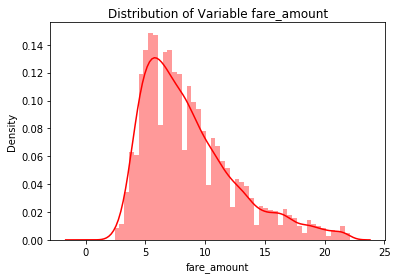

passenger_count


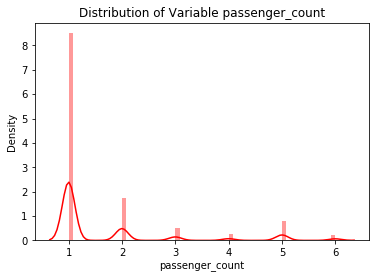

year


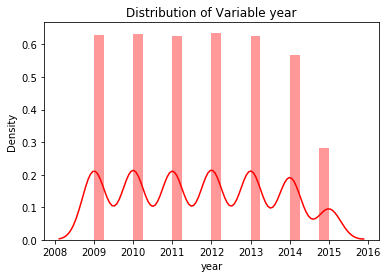

month


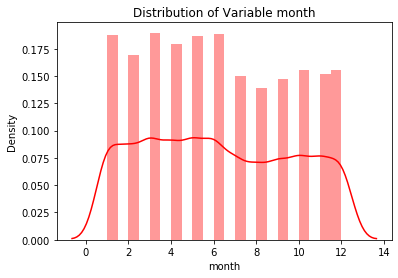

day_of_week


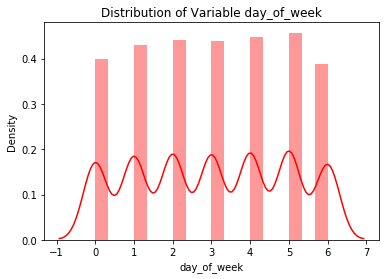

hour


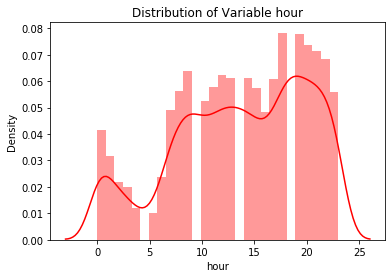

haversine_distance


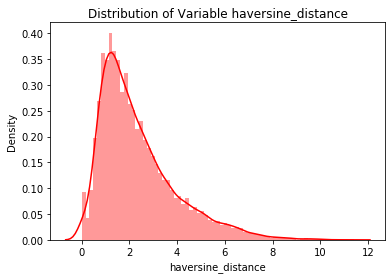

In [67]:
# Normality check for few variables

for i in ['fare_amount', 'passenger_count', 'year', 'month', 'day_of_week', 'hour', 'haversine_distance']:
    print(i)
    sns.distplot(data[i], bins='auto', color='red')
    plt.title('Distribution of Variable '+i)
    plt.ylabel('Density')
    plt.show()

In [68]:
# User defined function to take log
new_variables = []
log_data = pd.DataFrame()
def apply_log1p(df, column_names):
    for i in column_names:
        new_col_name = "logOf_{0}".format(i)
        log_data[new_col_name] = np.log1p(df[i])
        new_variables.append(new_col_name)

In [69]:
# User defined function to take inverse of log
def apply_expm1(df):
    df = np.expm1(df)
    return df

In [70]:
# Select variables whose values has to be taken log
variables = ['fare_amount', 'passenger_count', 'year', 'month', 'day_of_week', 'hour', 'haversine_distance']

#Function Call to apply_log1p
apply_log1p(data, variables)

log_data

,logOf_fare_amount,logOf_passenger_count,logOf_year,logOf_month,logOf_day_of_week,logOf_hour,logOf_haversine_distance
1,2.884801,0.693147,7.606387,0.693147,0.693147,2.833213,2.246029
2,1.902108,1.098612,7.606885,2.197225,1.386294,0.000000,0.871095
3,2.163323,0.693147,7.607381,1.609438,1.791759,1.609438,1.334809
4,1.840550,0.693147,7.606387,1.386294,0.693147,2.079442,1.098331
5,2.572612,0.693147,7.606885,0.693147,1.386294,2.302585,1.565954
...,...,...,...,...,...,...,...
16061,2.476538,0.693147,7.605890,1.791759,1.098612,2.944439,1.471896
16062,2.014903,0.693147,7.608374,2.564949,1.609438,2.079442,0.615210
16063,2.839078,1.098612,7.605890,2.079442,0.000000,2.079442,2.182408
16064,2.251292,0.693147,7.605890,2.484907,1.098612,2.484907,0.903856


In [71]:
data

,fare_amount,passenger_count,year,month,day_of_week,hour,haversine_distance
1,16.9,1,2010,1,1,16,8.450134
2,5.7,2,2011,8,3,0,1.389525
3,7.7,1,2012,4,5,4,2.799270
4,5.3,1,2010,3,1,7,1.999157
5,12.1,1,2011,1,3,9,3.787239
...,...,...,...,...,...,...,...
16061,10.9,1,2009,5,2,18,3.357490
16062,6.5,1,2014,12,4,7,0.850044
16063,16.1,2,2009,7,0,7,7.867638
16064,8.5,1,2009,11,2,11,1.469105


logOf_fare_amount


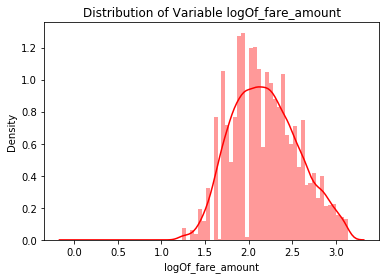

logOf_passenger_count


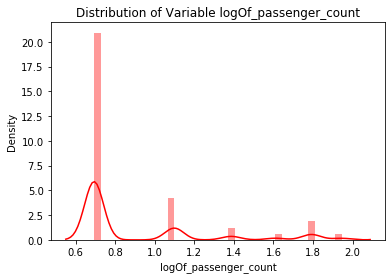

logOf_year


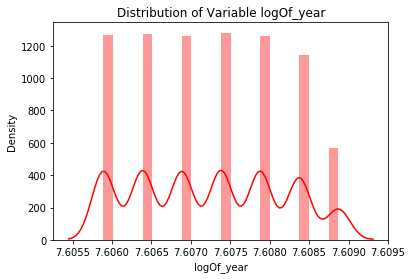

logOf_month


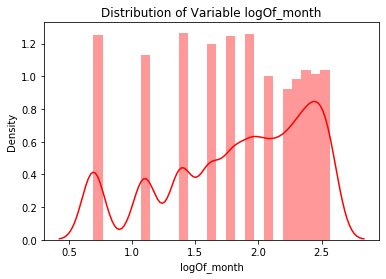

logOf_day_of_week


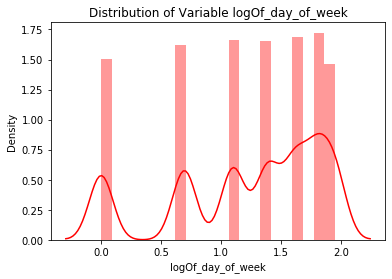

logOf_hour


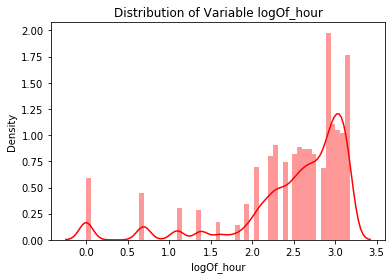

logOf_haversine_distance


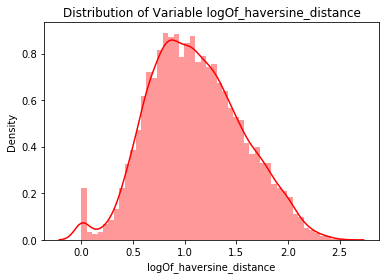

In [72]:
# Confirming Normality check for the variables after log transformation

for i in new_variables:
    print(i)
    sns.distplot(log_data[i], bins='auto', color='red')
    plt.title('Distribution of Variable '+i)
    plt.ylabel('Density')
    plt.show()
    
new_variables = []

## Splitting Train and Test data

In [73]:
##Create dummies for categorical variables
# cat_variables = ["passenger_count", "year", "month", "day_of_week", "hour"]

# for i in cat_variables:
#     temp = pd.get_dummies(data[i], prefix = i)
#     data = data.join(temp)

In [74]:
log_data.head(500)

,logOf_fare_amount,logOf_passenger_count,logOf_year,logOf_month,logOf_day_of_week,logOf_hour,logOf_haversine_distance
1,2.884801,0.693147,7.606387,0.693147,0.693147,2.833213,2.246029
2,1.902108,1.098612,7.606885,2.197225,1.386294,0.000000,0.871095
3,2.163323,0.693147,7.607381,1.609438,1.791759,1.609438,1.334809
4,1.840550,0.693147,7.606387,1.386294,0.693147,2.079442,1.098331
5,2.572612,0.693147,7.606885,0.693147,1.386294,2.302585,1.565954
6,2.140066,0.693147,7.607381,2.484907,0.693147,3.044522,0.938368
7,2.862201,0.693147,7.607381,0.693147,1.098612,2.890372,1.640053
9,2.292535,1.098612,7.605890,2.302585,1.098612,0.693147,1.347976
10,1.840550,0.693147,7.607381,1.609438,1.945910,2.079442,0.864819
12,1.629241,1.098612,7.605890,2.484907,1.609438,0.693147,0.541025


In [75]:
log_data.columns

Index(['logOf_fare_amount', 'logOf_passenger_count', 'logOf_year',
       'logOf_month', 'logOf_day_of_week', 'logOf_hour',
       'logOf_haversine_distance'],
      dtype='object')

In [76]:
train = log_data.drop(['logOf_fare_amount'], axis=1)
test = log_data['logOf_fare_amount']

train_ = data.drop(['fare_amount'], axis=1)
test_ = data['fare_amount']

In [77]:
print(train.shape, test.shape)

(13353, 6) (13353,)


In [78]:
xtrain, xtest, ytrain, ytest = train_test_split(train, test, test_size = 0.90, random_state=42)
print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)

x_train, x_test, y_train, y_test = train_test_split(train_, test_, test_size = 0.90, random_state=42)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1335, 6) (1335,) (12018, 6) (12018,)
(1335, 6) (1335,) (12018, 6) (12018,)


## Linear Regression

In [79]:
# Object for linear Regression
from sklearn.metrics import confusion_matrix
model_LR = LinearRegression()
model_LR.fit(xtrain, ytrain)
ypred_LR = model_LR.predict(xtest)
print('Train accuracy Score: ', model_LR.score(xtrain, ytrain)*100)
print('Test accuracy Score: ', model_LR.score(xtest, ytest)*100)

Train accuracy Score:  68.79371495665612
Test accuracy Score:  69.57607814663798


In [80]:
# Saving the model
filename = '1.LinearRegressionModel.sav'
pickle.dump(model_LR, open(filename, 'wb'))

result_LR = pd.DataFrame()
result_LR['ytest'] = ytest
result_LR['ypred_LR'] = ypred_LR
result_LR['Actual_Price'] = y_test
result_LR['Predicted_Price'] = apply_expm1(result_LR['ypred_LR'])
result_LR

,ytest,ypred_LR,Actual_Price,Predicted_Price
2231,2.370244,2.337087,9.7,9.351037
9177,1.252763,1.389201,2.5,3.011643
13093,1.871802,2.114002,5.5,7.281319
2467,2.251292,2.454426,8.5,10.639745
1374,2.674149,2.324390,13.5,9.220440
...,...,...,...,...
14549,2.332144,2.225459,9.3,8.257727
9723,2.208274,2.193626,8.1,7.967667
10344,2.251292,2.189638,8.5,7.931976
9610,3.068053,2.960409,20.5,18.305875


In [81]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [82]:
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, result_LR['Predicted_Price']))
LR_mape = mean_absolute_percentage_error(y_test, result_LR['Predicted_Price'])
print('Mean Absolute Percentage Error: ', LR_mape)
print('Which means the model is ', (100 - LR_mape), 'percentage correct.')
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, result_LR['Predicted_Price']))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, result_LR['Predicted_Price'])))

Mean Absolute Percentage Error:  20.70335519304837
Which means the model is  79.29664480695163 percentage correct.


## Logistic Regression

#### We cannot use Logistic Regression, since it can be applied only when the there is only two possible outcomes.


In [83]:
# logit_reg = LogisticRegression()
# logit_reg.fit(xtrain, ytrain.astype(np.int64))
# logit_reg.score(xtest, ytest.astype(np.int64))

## Random Forest

In [84]:
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor()
model_RF.fit(xtrain, ytrain)
ypred_RF = model_RF.predict(xtest)
print('Train accuracy Score: ', model_RF.score(xtrain, ytrain)*100)
print('Test accuracy Score: ', model_RF.score(xtest, ytest)*100)

Train accuracy Score:  93.71494784554237
Test accuracy Score:  67.5538612713281


C:\Users\SANDEEP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [85]:
# Saving the model
filename = '2.RandomForestModel.sav'
pickle.dump(model_RF, open(filename, 'wb'))

result_RF = pd.DataFrame()
result_RF['ytest'] = ytest
result_RF['ypred_RF'] = ypred_RF
result_RF['Actual_Price'] = y_test
result_RF['Predicted_Price'] = apply_expm1(result_RF['ypred_RF'])
result_RF

,ytest,ypred_RF,Actual_Price,Predicted_Price
2231,2.370244,2.245746,9.7,8.447461
9177,1.252763,1.728648,2.5,4.633035
13093,1.871802,2.106026,5.5,7.215528
2467,2.251292,2.485718,8.5,11.009741
1374,2.674149,2.436043,13.5,10.427728
...,...,...,...,...
14549,2.332144,2.219071,9.3,8.198783
9723,2.208274,2.213665,8.1,8.149187
10344,2.251292,2.143351,8.5,7.527967
9610,3.068053,3.059660,20.5,20.320312


In [86]:
# print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, result_RF['Predicted_Price']))
RF_mape = mean_absolute_percentage_error(y_test, result_RF['Predicted_Price'])
print('Mean Absolute Percentage Error: ', RF_mape)
print('Which means the model is ', (100 - RF_mape), 'percentage correct.')
# print('Mean Squared Error:', metrics.mean_squared_error(ytest, result_RF['Predicted_Price']))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, result_RF['Predicted_Price'])))

Mean Absolute Percentage Error:  22.10280182862378
Which means the model is  77.89719817137622 percentage correct.


## Decision Tree

In [87]:
from sklearn.tree import DecisionTreeRegressor
model_DT = DecisionTreeRegressor()
model_DT.fit(xtrain, ytrain)
ypred_DT = model_DT.predict(xtest)
print('Train accuracy Score: ', model_DT.score(xtrain, ytrain)*100)
print('Test accuracy Score: ', model_DT.score(xtest, ytest)*100)

Train accuracy Score:  100.0
Test accuracy Score:  42.80571512005231


In [88]:
# Saving the model
filename = '3.DecisionTreeModel.sav'
pickle.dump(model_DT, open(filename, 'wb'))

result_DT = pd.DataFrame()
result_DT['ytest'] = ytest
result_DT['ypred_DT'] = ypred_DT
result_DT['Actual_Price'] = y_test
result_DT['Predicted_Price'] = apply_expm1(result_DT['ypred_DT'])
result_DT

,ytest,ypred_DT,Actual_Price,Predicted_Price
2231,2.370244,2.251292,9.7,8.5
9177,1.252763,1.945910,2.5,6.0
13093,1.871802,2.014903,5.5,6.5
2467,2.251292,2.302585,8.5,9.0
1374,2.674149,2.406945,13.5,10.1
...,...,...,...,...
14549,2.332144,2.208274,9.3,8.1
9723,2.208274,1.902108,8.1,5.7
10344,2.251292,1.974081,8.5,6.2
9610,3.068053,2.995732,20.5,19.0


In [89]:
# print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, result_DT['Predicted_Price']))
DT_mape = mean_absolute_percentage_error(y_test, result_DT['Predicted_Price'])
print('Mean Absolute Percentage Error: ', DT_mape)
print('Which means the model is ', (100 - DT_mape), 'percentage correct.')
# print('Mean Squared Error:', metrics.mean_squared_error(ytest, result_DT['Predicted_Price']))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, result_DT['Predicted_Price'])))

Mean Absolute Percentage Error:  28.713994022422828
Which means the model is  71.28600597757718 percentage correct.


## SVR

In [90]:
from sklearn.svm import SVR
model_SVR = SVR() #C=1.0, epsilon=0.2)
model_SVR.fit(xtrain, ytrain)
ypred_SVR = model_SVR.predict(xtest)
print('Train accuracy Score: ', model_SVR.score(xtrain, ytrain)*100)
print('Test accuracy Score: ', model_SVR.score(xtest, ytest)*100)

C:\Users\SANDEEP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train accuracy Score:  68.63356002881046
Test accuracy Score:  67.23611290509075


In [91]:
# Saving the model
filename = '4.SVR_Model.sav'
pickle.dump(model_SVR, open(filename, 'wb'))

result_SVR = pd.DataFrame()
result_SVR['ytest'] = ytest
result_SVR['ypred_SVR'] = ypred_SVR
result_SVR['Actual_Price'] = y_test
result_SVR['Predicted_Price'] = apply_expm1(result_SVR['ypred_SVR'])
result_SVR

,ytest,ypred_SVR,Actual_Price,Predicted_Price
2231,2.370244,2.423589,9.7,10.286288
9177,1.252763,1.562841,2.5,3.772362
13093,1.871802,2.025892,5.5,6.582873
2467,2.251292,2.340114,8.5,9.382422
1374,2.674149,2.315220,13.5,9.127148
...,...,...,...,...
14549,2.332144,2.249578,9.3,8.483729
9723,2.208274,2.240725,8.1,8.400142
10344,2.251292,2.220001,8.5,8.207339
9610,3.068053,2.880515,20.5,16.823458


In [92]:
# print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, result_SVR['Predicted_Price']))
SVR_mape = mean_absolute_percentage_error(y_test, result_SVR['Predicted_Price'])
print('Mean Absolute Percentage Error: ', SVR_mape)
print('Which means the model is ', (100 - SVR_mape), 'percentage correct.')
# print('Mean Squared Error:', metrics.mean_squared_error(ytest, result_SVR['Predicted_Price']))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, result_SVR['Predicted_Price'])))

Mean Absolute Percentage Error:  20.818938161417417
Which means the model is  79.18106183858258 percentage correct.


## K Neighbours Regressor

In [93]:
from sklearn.neighbors import KNeighborsRegressor
model_KNR = KNeighborsRegressor(n_neighbors=3)
model_KNR.fit(xtrain, ytrain)
ypred_KNR = model_KNR.predict(xtest)
print('Train accuracy Score: ', model_KNR.score(xtrain, ytrain)*100)
print('Test accuracy Score: ', model_KNR.score(xtest, ytest)*100)

Train accuracy Score:  76.78273528066401
Test accuracy Score:  55.74466205763736


In [94]:
# Saving the model
filename = '5.K-Neigh_Model.sav'
pickle.dump(model_KNR, open(filename, 'wb'))

result_KNR = pd.DataFrame()
result_KNR['ytest'] = ytest
result_KNR['ypred_KNR'] = ypred_KNR
result_KNR['Actual_Price'] = y_test
result_KNR['Predicted_Price'] = apply_expm1(result_KNR['ypred_KNR'])
result_KNR

,ytest,ypred_KNR,Actual_Price,Predicted_Price
2231,2.370244,2.241700,9.7,8.409312
9177,1.252763,1.609305,2.5,3.999333
13093,1.871802,2.002973,5.5,6.411056
2467,2.251292,2.470760,8.5,10.831440
1374,2.674149,2.227238,13.5,8.274215
...,...,...,...,...
14549,2.332144,2.287063,9.3,8.845973
9723,2.208274,2.295885,8.1,8.933222
10344,2.251292,2.082187,8.5,7.021997
9610,3.068053,2.950316,20.5,18.111989


In [95]:
# print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, result_KNR['Predicted_Price']))
KNR_mape = mean_absolute_percentage_error(y_test, result_KNR['Predicted_Price'])
print('Mean Absolute Percentage Error: ', KNR_mape)
print('Which means the model is ', (100 - KNR_mape), 'percentage correct.')
# print('Mean Squared Error:', metrics.mean_squared_error(ytest, result_KNR['Predicted_Price']))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, result_KNR['Predicted_Price'])))

Mean Absolute Percentage Error:  26.352797895559853
Which means the model is  73.64720210444014 percentage correct.


## Gradient Boosting Regressor

In [96]:
from sklearn import ensemble
model_GBR = ensemble.GradientBoostingRegressor()
model_GBR.fit(xtrain, ytrain)
ypred_GBR = model_GBR.predict(xtest)
print('Train accuracy Score: ', model_GBR.score(xtrain, ytrain)*100)
print('Test accuracy Score: ', model_GBR.score(xtest, ytest)*100)

Train accuracy Score:  80.58804506362759
Test accuracy Score:  71.8610169004067


In [97]:
# Saving the model
filename = '6.GradientBoostingModel.sav'
pickle.dump(model_GBR, open(filename, 'wb'))

result_GBR = pd.DataFrame()
result_GBR['ytest'] = ytest
result_GBR['ypred_GBR'] = ypred_GBR
result_GBR['Actual_Price'] = y_test
result_GBR['Predicted_Price'] = apply_expm1(result_GBR['ypred_GBR'])
result_GBR

,ytest,ypred_GBR,Actual_Price,Predicted_Price
2231,2.370244,2.431677,9.7,10.377944
9177,1.252763,1.742405,2.5,4.711062
13093,1.871802,2.037803,5.5,6.673728
2467,2.251292,2.503979,8.5,11.231069
1374,2.674149,2.363921,13.5,9.632559
...,...,...,...,...
14549,2.332144,2.204213,9.3,8.063114
9723,2.208274,2.154811,8.1,7.626257
10344,2.251292,2.135724,8.5,7.463175
9610,3.068053,3.014871,20.5,19.386455


In [98]:
# print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, result_GBR['Predicted_Price']))
GBR_mape = mean_absolute_percentage_error(y_test, result_GBR['Predicted_Price'])
print('Mean Absolute Percentage Error: ', GBR_mape)
print('Which means the model is ', (100 - GBR_mape), 'percentage correct.')
# print('Mean Squared Error:', metrics.mean_squared_error(ytest, result_GBR['Predicted_Price']))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, result_GBR['Predicted_Price'])))

Mean Absolute Percentage Error:  20.99816109576181
Which means the model is  79.00183890423818 percentage correct.


_______________________________________________________________________________________________________________

##############################################################################################################################